In [75]:
import pickle
import pandas as pd
import numpy as np 
import networkx as nx
import matplotlib.pyplot as plt 
import cvxpy as cp 
import sys 
import os.path
import warnings
warnings.filterwarnings('ignore') 
import seaborn as sb

from networkx.algorithms.centrality import degree_centrality, betweenness_centrality, closeness_centrality

from empyrial import *

In [2]:
snp_tickers = pd.read_pickle('Data/tickers.pickle')

ValueError: unsupported pickle protocol: 5

In [3]:
!pip3 install pickle5
import pickle5 as pickle
with open('Data/tickers.pickle', "rb") as fh:
  tickers = pickle.load(fh)

In [4]:
# tickers = pd.read_pickle('Data/tickers.pickle')
modpath = os.path.dirname(os.path.abspath(sys.argv[0]))
temp = 'Data/Stocks/s&p/' + tickers[0] + '.csv'
datapath = os.path.join(modpath, temp)
data = pd.read_csv(temp, index_col='Date', parse_dates=True)
stock_df = pd.DataFrame()
stock_df[tickers[0]] = data['Close']

for i in range(1, len(tickers)):
    try:
        temp = 'Data/Stocks/s&p/' + tickers[i] + '.csv'
        datapath = os.path.join(modpath, temp)
        data = pd.read_csv(temp, index_col='Date', parse_dates=True)
        stock_df[tickers[i]] = data['Close']
    except:
        print(tickers[i])


LB


In [5]:
stock_df = stock_df.drop('Bond', axis=1)


In [6]:
count = 0
for column in stock_df.columns:
    if stock_df[column].isnull().sum() > 0:
        stock_df.drop(column, axis=1, inplace=True)
        count += 1
        print(column)
print(count)
    

WRK
HWM
2


In [7]:
def calc_Mu(df):
    mu = df.mean() * 252
    return mu

def calc_sigma(df):
    sigma = df.cov() * 252
    sigma = sigma.values
    return sigma
    
def calc_delta(df):
    delta = np.full((len(df.columns), 1), 0.02)
    delta[len(df.columns)-1] = 0.005
    return delta 

In [139]:
returns = np.log(stock_df/stock_df.shift(1))
returns.dropna(inplace=True)
original_returns = returns.copy()

In [9]:
for column in returns.columns:
    if returns[column].isnull().sum() > 1:
        print(returns[column].isnull().sum())
        print(column)

In [140]:
returns = returns.loc['2016-01-02':'2018-12-31']

In [141]:
max(returns.std())

0.03643124172027943

In [192]:
original_returns.loc['2013-01-01':'2015-12-31']

,GLW,ED,DHR,DRI,D,ETN,ES,FITB,FE,BEN,FCX,GE,HUM,HBAN,KLAC,LEG,L,MAR,MKC,MCK,MET,MCO,MS,MSI,NI,NTRS,OMC,PAYX,PNW,PPL,QCOM,RTX,ROK,SPGI,SRE,SBUX,STT,TROW,TPR,TXN,TSN,USB,VLO,VIAC,VNO,WM,WAT,WY,WHR,MO,AEP,BA,BMY,CPB,CAT,CVX,KO,CL,COP,CVS,DE,DTE,EIX,ETR,EXC,XOM,F,GD,HAL,HIG,HSY,IBM,IP,KMB,KR,MRK,NSC,PEP,PFE,PPG,PG,PEG,SEE,SO,UNP,XEL,ABT,HON,SHW,CMI,EMR,SLB,CSX,CLX,GIS,NEM,MCD,LLY,BAX,BDX,JNJ,GPC,HPQ,WMB,JPM,IFF,AXP,BAC,CI,DUK,LNC,TAP,NEE,DIS,WFC,MMM,INTC,TGT,TXT,VFC,WBA,AIG,FDX,PCAR,ADP,GWW,MAS,ADM,WMT,SNA,SWK,AAPL,OXY,CAG,T,VZ,LOW,PHM,HES,LMT,HAS,BLL,APD,NUE,PKI,NOC,CNP,TJX,DOV,PH,ITW,GPS,MDT,SYY,MMC,AVY,HD,PNC,C,NKE,ECL,GL,NWL,ORCL,K,ADSK,MRO,AEE,AMGN,LIN,IPG,COST,CSCO,EMN,KEY,UNM,MSFT,LUV,UNH,MU,BSX,AMAT,BK,ALL,CMA,AON,AZO,ADBE,CAH,SCHW,EFX,APA,PGR,YUM,TFC,CINF,COF,RF,AES,CCL,LUMN,CMS,AFL,NTAP,BBY,VMC,ADI,XLNX,CTXS
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2013-01-02,0.018839,0.018729,0.027873,0.007295,0.021391,0.041043,0.018758,0.036814,0.005254,0.033406,0.027968,0.016537,-0.002772,0.027780,0.037197,0.019284,0.018960,0.039974,0.026407,0.006579,0.064937,0.028408,0.025815,0.009296,0.014360,0.032365,0.029582,0.023830,0.027473,0.015939,0.045660,0.023976,0.024695,0.019024,0.017329,0.025225,0.027485,0.028162,-0.006869,0.044944,0.029459,0.031739,0.039085,0.032323,0.010435,0.006794,0.018086,0.046700,0.051898,0.034389,0.022473,0.022437,0.003675,0.029094,0.042495,0.020593,0.036565,0.016790,0.020820,0.027136,0.018004,0.023534,0.017983,0.015565,0.002686,0.024650,0.019121,0.027621,0.028979,0.055052,0.028798,0.024750,0.016184,0.022833,0.013362,0.009723,0.023177,0.013066,0.032558,0.023367,0.021854,0.010727,0.024261,0.022405,0.021560,0.024775,0.019633,0.019966,0.018422,0.045290,0.030497,0.029853,0.022056,0.011812,0.022022,0.009857,0.021422,0.003845,0.014742,0.015986,0.010501,0.024393,0.052626,0.038645,0.015571,0.026838,0.021854,0.035537,0.031304,0.018788,0.056665,0.017376,0.019040,0.025970,0.025135,0.020573,0.036194,-0.005933,0.027453,-0.004049,0.027976,0.032881,0.027210,0.028994,0.025322,0.026141,0.024312,0.045673,0.014694,0.023398,0.019678,0.031190,0.020030,0.019803,0.037554,0.022848,0.018687,0.023940,0.014062,0.010563,-0.002231,0.028636,0.021663,0.036847,0.010967,0.008692,0.019038,0.016819,0.023017,0.030109,0.019057,0.010575,0.020749,0.007552,0.030007,0.015909,0.026013,0.020875,0.041833,0.004640,0.033238,0.016888,0.015152,0.040294,0.018802,0.043997,0.031779,0.019343,0.033650,0.028196,0.053876,0.027177,0.034512,0.025105,0.041867,0.030277,0.033502,0.022212,0.005516,0.044726,0.027540,0.034368,0.044891,0.024347,0.031790,0.032204,0.006889,0.017364,0.012309,0.048923,0.011391,0.028135,0.027578,0.011381,0.032446,0.017968,0.055402,0.024932,0.027652,0.019659,0.026736,0.017484,0.017726,0.022108,-0.003381,0.034555,0.045092,0.033725,0.038124
2013-01-03,-0.007023,-0.000177,0.009523,-0.012411,0.001133,-0.001418,-0.005540,-0.008917,0.001428,-0.001386,-0.009140,-0.011310,-0.032522,0.012103,-0.008712,0.005032,0.004325,0.007960,-0.003378,0.011613,-0.001423,0.004048,-0.002041,-0.003387,-0.001189,-0.000386,0.003298,0.001569,-0.000764,0.003774,-0.004644,0.003684,0.001161,-0.007928,-0.003053,0.006705,-0.005395,0.000149,-0.003270,-0.013084,0.018349,-0.014050,-0.021653,-0.006126,0.004808,0.003526,-0.028470,0.000000,-0.002523,0.000614,-0.000688,0.005177,0.016073,0.001947,0.009580,-0.004267,0.000000,0.003287,-0.000676,0.002011,-0.002503,-0.000814,0.007147,-0.004799,0.008016,-0.001805,0.019506,0.003924,0.016662,0.019215,-0.011093,-0.005516,-0.002968,-0.004293,0.000758,0.023665,0.002682,0.000433,-0.002318,-0.005791,-0.006361,0.000000,0.003339,-0.000228,0.001400,-0.002926,0.037359,0.003854,-0.009878,0.007032,0.004751,-0.006745,0.009376,-0.002703,0.000484,-0.027672,0.005643,0.004233,0.001920,0.011762,-0.001413,0.003830,0.007958,-0.007670,-0.002017,-0.003664,0.004246,-0.005836,-0.014793,-0.002156,0.017

In [142]:
min(returns.std())

0.008333377398749993

In [12]:
max(returns.corr())

'YUM'

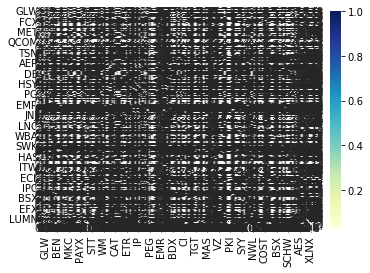

In [13]:
# plotting correlation heatmap
dataplot = sb.heatmap(returns.corr(), cmap="YlGnBu", annot=True)
  


In [143]:
corr_1 = returns.corr()

In [144]:
corr_1.describe()

,GLW,ED,DHR,DRI,D,ETN,ES,FITB,FE,BEN,FCX,GE,HUM,HBAN,KLAC,LEG,L,MAR,MKC,MCK,MET,MCO,MS,MSI,NI,NTRS,OMC,PAYX,PNW,PPL,QCOM,RTX,ROK,SPGI,SRE,SBUX,STT,TROW,TPR,TXN,TSN,USB,VLO,VIAC,VNO,WM,WAT,WY,WHR,MO,AEP,BA,BMY,CPB,CAT,CVX,KO,CL,COP,CVS,DE,DTE,EIX,ETR,EXC,XOM,F,GD,HAL,HIG,HSY,IBM,IP,KMB,KR,MRK,NSC,PEP,PFE,PPG,PG,PEG,SEE,SO,UNP,XEL,ABT,HON,SHW,CMI,EMR,SLB,CSX,CLX,GIS,NEM,MCD,LLY,BAX,BDX,JNJ,GPC,HPQ,WMB,JPM,IFF,AXP,BAC,CI,DUK,LNC,TAP,NEE,DIS,WFC,MMM,INTC,TGT,TXT,VFC,WBA,AIG,FDX,PCAR,ADP,GWW,MAS,ADM,WMT,SNA,SWK,AAPL,OXY,CAG,T,VZ,LOW,PHM,HES,LMT,HAS,BLL,APD,NUE,PKI,NOC,CNP,TJX,DOV,PH,ITW,GPS,MDT,SYY,MMC,AVY,HD,PNC,C,NKE,ECL,GL,NWL,ORCL,K,ADSK,MRO,AEE,AMGN,LIN,IPG,COST,CSCO,EMN,KEY,UNM,MSFT,LUV,UNH,MU,BSX,AMAT,BK,ALL,CMA,AON,AZO,ADBE,CAH,SCHW,EFX,APA,PGR,YUM,TFC,CINF,COF,RF,AES,CCL,LUMN,CMS,AFL,NTAP,BBY,VMC,ADI,XLNX,CTXS
count,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000
mean,0.359670,0.106854,0.357996,0.219443,0.155049,0.375929,0.162253,0.325812,0.167731,0.371639,0.240959,0.224348,0.220420,0.324453,0.296342,0.339168,0.407307,0.321552,0.235485,0.205039,0.339016,0.399146,0.387601,0.288522,0.158623,0.379077,0.283622,0.365195,0.172290,0.187417,0.286611,0.360382,0.379284,0.381382,0.177756,0.256553,0.357136,0.398133,0.239662,0.343641,0.166715,0.390180,0.265550,0.264551,0.289208,0.317966,0.300014,0.312864,0.277013,0.195734,0.158985,0.340964,0.187850,0.143996,0.370933,0.322190,0.290560,0.255420,0.275343,0.230275,0.307915,0.157973,0.132610,0.176407,0.212106,0.324059,0.297479,0.333481,0.279473,0.347743,0.190414,0.316574,0.345144,0.235965,0.146460,0.273474,0.344048,0.261874,0.301191,0.346697,0.257484,0.191201,0.300650,0.123822,0.339970,0.148068,0.343263,0.405144,0.308031,0.337562,0.379499,0.287685,0.301967,0.198724,0.207123,0.036771,

In [16]:
# set up display area to show dataframe in jupyter qtconsole

# pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [24]:
corr_1

,GLW,ED,DHR,DRI,D,ETN,ES,FITB,FE,BEN,FCX,GE,HUM,HBAN,KLAC,LEG,L,MAR,MKC,MCK,MET,MCO,MS,MSI,NI,NTRS,OMC,PAYX,PNW,PPL,QCOM,RTX,ROK,SPGI,SRE,SBUX,STT,TROW,TPR,TXN,TSN,USB,VLO,VIAC,VNO,WM,WAT,WY,WHR,MO,AEP,BA,BMY,CPB,CAT,CVX,KO,CL,COP,CVS,DE,DTE,EIX,ETR,EXC,XOM,F,GD,HAL,HIG,HSY,IBM,IP,KMB,KR,MRK,NSC,PEP,PFE,PPG,PG,PEG,SEE,SO,UNP,XEL,ABT,HON,SHW,CMI,EMR,SLB,CSX,CLX,GIS,NEM,MCD,LLY,BAX,BDX,JNJ,GPC,HPQ,WMB,JPM,IFF,AXP,BAC,CI,DUK,LNC,TAP,NEE,DIS,WFC,MMM,INTC,TGT,TXT,VFC,WBA,AIG,FDX,PCAR,ADP,GWW,MAS,ADM,WMT,SNA,SWK,AAPL,OXY,CAG,T,VZ,LOW,PHM,HES,LMT,HAS,BLL,APD,NUE,PKI,NOC,CNP,TJX,DOV,PH,ITW,GPS,MDT,SYY,MMC,AVY,HD,PNC,C,NKE,ECL,GL,NWL,ORCL,K,ADSK,MRO,AEE,AMGN,LIN,IPG,COST,CSCO,EMN,KEY,UNM,MSFT,LUV,UNH,MU,BSX,AMAT,BK,ALL,CMA,AON,AZO,ADBE,CAH,SCHW,EFX,APA,PGR,YUM,TFC,CINF,COF,RF,AES,CCL,LUMN,CMS,AFL,NTAP,BBY,VMC,ADI,XLNX,CTXS
GLW,1.000000,0.210534,0.529733,0.350945,0.272426,0.582527,0.289020,0.401314,0.255687,0.565302,0.439414,0.426215,0.300486,0.363953,0.505163,0.501758,0.555967,0.550173,0.275626,0.285242,0.521262,0.466497,0.519811,0.423388,0.328584,0.483826,0.490607,0.496380,0.316728,0.279662,0.447364,0.555969,0.584901,0.461605,0.352799,0.410204,0.428912,0.576961,0.420148,0.549353,0.280583,0.440973,0.430419,0.472118,0.477975,0.421549,0.431827,0.361567,0.481030,0.271363,0.283862,0.478360,0.287757,0.194502,0.542939,0.483587,0.333226,0.306089,0.435348,0.320858,0.539713,0.315733,0.282662,0.271984,0.279123,0.473644,0.425794,0.506952,0.467904,0.473716,0.246195,0.463534,0.478977,0.280118,0.241064,0.327517,0.535780,0.308041,0.400051,0.549308,0.303213,0.329138,0.449798,0.177082,0.538281,0.256977,0.353421,0.599169,0.404636,0.570891,0.571190,0.500478,0.513325,0.261302,0.192307,0.126557,0.347463,0.337865,0.309321,0.358275,0.383167,0.484756,0.432381,0.398735,0.490004,0.453341,0.483405,0.443548,0.388747,0.250054,0.498825,0.298672,0.278137,0.494744,0.445398,0.568457,0.511336,0.331902,0.465738,0.432613,0.347968,0.302338,0.521456,0.549176,0.483921,0.414570,0.492354,0.425250,0.252062,0.537437,0.553197,0.447871,0.479644,0.255203,0.343924,0.314772,0.439151,0.431932,0.458523,0.365585,0.363647,0.429782,0.534250,0.522428,0.489696,0.436731,0.339416,0.386150,0.562782,0.584828,0.596063,0.325362,0.379416,0.348554,0.470253,0.480915,0.473087,0.435869,0.435704,0.409930,0.440757,0.494980,0.379091,0.492517,0.219472,0.459283,0.435013,0.308926,0.338417,0.550337,0.450543,0.361848,0.514521,0.556835,0.440234,0.529122,0.444445,0.378443,0.348990,0.472301,0.369757,0.527183,0.486849,0.443547,0.468265,0.432839,0.257189,0.466550,0.336672,0.517449,0.446952,0.437328,0.475899,0.400413,0.453756,0.493155,0.446835,0.436890,0.411522,0.489677,0.269819,0.308489,0.437298,0.454692,0.340828,0.429671,0.535577,0.493175,0.426177
ED,0.210534,1.000000,0.323657,0.250205,0.724711,0.239260,0.763343,0.154710,0.581771,0.251097,0.100339,0.224448,0.194563,0.139878,0.196190,0.268770,0.326225,0.221763,0.392003,0.153751,0.206196,0.237602,0.183497,0.215016,0.650814,0.184640,0.267220,0.338174,0.771714,0.631728,0.163865,0.313965,0.235452,0.234255,0.646840,0.240410,0.160924,0.264856,0.159299,0.181540,0.238764,0.217941,0.196237,0.242229,0.372767,0.417493,0.225635,0.226268,0.253281,0.361447,0.763087,0.233812,0.235034,0.359370,0.206941,0.285150,0.423347,0.403378,0.179634,0.210990,0.215775,0.778476,0.588244,0.704453,0.589707,0.313435,0.165641,0.281510,0.161745,0.243154,0.359932,0.244428,0.244622,0.426332,0.170341,0.305366,0.236393,0.416920,0.285091,0.272859,0.409478,0.710198,0.269591,0.765703,0.238963,0.819118,0.266436,0.323970,0.213277,0.218253,0.263088,0.206865,0.226579,0.405710,0.348154,0.162715,0.308586,0.317404,0.246775,0.277108,0.359725,0.285571,0.147861,0.182606,0.205887,0.269718,0.255465,0.139421,0.214193,0.780815,0.178616,0.281340,0.707222,0.260579,0.189009,0.311736,0.215145,0.194841,0.202360,0.202889,0.224887,0.162841,0.229311,0.229099,0.331876,0.202244,0.248115,0.268884,0.283616,0.253897,0.226862,0.158338,0.229620,0.271978,0.339657,0.401804,0.225223,0.238894,0.165996,0.279841,0.186928,0.308250,0.292407

In [27]:
#extracts the indices from the correlation matrix, which are the stocks
stocks = corr_1.index.values
#Changes from dataframe to matrix, so it is easier to create a graph with networkx
cor_matrix = np.asmatrix(corr_1)

In [34]:
corr_1['GLW']['ED']

0.21053357561286729

In [49]:
def edge_maker(c, df):
    edges = {}
    for i in range(len(df.columns)):
        for j in range(i+1, len(df.columns)):
            if df[df.columns[i]][df.columns[j]] >= c:
                edges[df.columns[i]] = df.columns[j]
    
    return edges

In [50]:
corr_1.columns[6]


'ES'

In [145]:
edges = edge_maker(0.7, corr_1)

In [146]:
len(edges)

61

In [147]:
g = nx.DiGraph(edges)


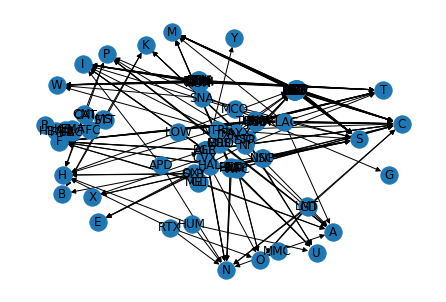

In [54]:
nx.draw(g,with_labels=True)
plt.draw()
plt.show()

In [148]:
g = nx.Graph()
for key, value in edges.items():
    g.add_edge(key, value)

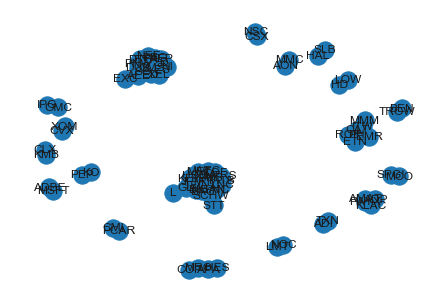

In [149]:
nx.draw(g,with_labels=True)
plt.draw()
plt.show()

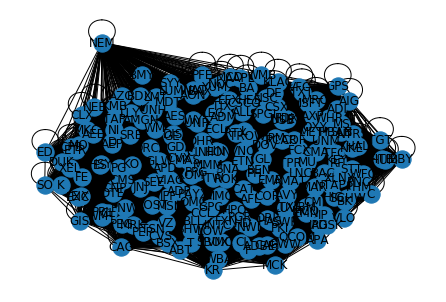

In [64]:
nx.draw(G,with_labels=True)
plt.draw()
plt.show()

In [56]:
g.edges

OutEdgeView([('ED', 'C'), ('ED', 'M'), ('ED', 'S'), ('D', 'C'), ('D', 'M'), ('D', 'S'), ('ETN', 'I'), ('ETN', 'T'), ('ETN', 'W'), ('ES', 'C'), ('ES', 'M'), ('ES', 'S'), ('FITB', 'R'), ('FITB', 'F'), ('BEN', 'U'), ('BEN', 'N'), ('BEN', 'M'), ('HUM', 'U'), ('HUM', 'N'), ('HUM', 'H'), ('HBAN', 'R'), ('HBAN', 'F'), ('KLAC', 'A'), ('KLAC', 'M'), ('KLAC', 'T'), ('L', 'C'), ('L', 'I'), ('L', 'N'), ('L', 'F'), ('MET', 'A'), ('MET', 'F'), ('MET', 'L'), ('MCO', 'S'), ('MCO', 'P'), ('MCO', 'G'), ('MCO', 'I'), ('MS', 'B'), ('MS', 'K'), ('NI', 'D'), ('NI', 'T'), ('NI', 'E'), ('NTRS', 'S'), ('NTRS', 'C'), ('NTRS', 'H'), ('NTRS', 'W'), ('PAYX', 'A'), ('PAYX', 'D'), ('PAYX', 'P'), ('PNW', 'C'), ('PNW', 'M'), ('PNW', 'S'), ('RTX', 'H'), ('RTX', 'O'), ('RTX', 'N'), ('ROK', 'I'), ('ROK', 'T'), ('ROK', 'W'), ('STT', 'B'), ('STT', 'K'), ('TROW', 'T'), ('TROW', 'F'), ('TROW', 'C'), ('TXN', 'A'), ('TXN', 'D'), ('TXN', 'I'), ('USB', 'T'), ('USB', 'F'), ('USB', 'C'), ('AEP', 'C'), ('AEP', 'M'), ('AEP', 'S'), (

In [150]:
from networkx.algorithms.centrality import degree_centrality, betweenness_centrality, closeness_centrality

degree_of_centrality = pd.DataFrame(degree_centrality(g).items())
degree_of_centrality

,0,1
0,ED,0.0125
1,CMS,0.1750
2,D,0.0125
3,ETN,0.0125
4,PH,0.0625
5,ES,0.0125
6,FITB,0.0125
7,RF,0.2375
8,BEN,0.0125
9,TROW,0.0125


In [174]:
betweenness_centrality = pd.DataFrame(betweenness_centrality(g).items())
betweenness_centrality

,0,1
0,ED,0.000000
1,CMS,0.032911
2,D,0.000000
3,ETN,0.000000
4,PH,0.004430
5,ES,0.000000
6,FITB,0.000000
7,RF,0.065823
8,BEN,0.000000
9,TROW,0.000000


In [175]:
closeness_centrality = pd.DataFrame(closeness_centrality(g).items())
closeness_centrality

,0,1
0,ED,0.093750
1,CMS,0.175781
2,D,0.093750
3,ETN,0.037500
4,PH,0.064286
5,ES,0.093750
6,FITB,0.128198
7,RF,0.239674
8,BEN,0.012500
9,TROW,0.012500


In [125]:
g.edges

OutEdgeView([('ED', 'C'), ('ED', 'M'), ('ED', 'S'), ('D', 'C'), ('D', 'M'), ('D', 'S'), ('ETN', 'I'), ('ETN', 'T'), ('ETN', 'W'), ('ES', 'C'), ('ES', 'M'), ('ES', 'S'), ('FITB', 'R'), ('FITB', 'F'), ('BEN', 'U'), ('BEN', 'N'), ('BEN', 'M'), ('HUM', 'U'), ('HUM', 'N'), ('HUM', 'H'), ('HBAN', 'R'), ('HBAN', 'F'), ('KLAC', 'A'), ('KLAC', 'M'), ('KLAC', 'T'), ('L', 'C'), ('L', 'I'), ('L', 'N'), ('L', 'F'), ('MET', 'A'), ('MET', 'F'), ('MET', 'L'), ('MCO', 'S'), ('MCO', 'P'), ('MCO', 'G'), ('MCO', 'I'), ('MS', 'B'), ('MS', 'K'), ('NI', 'D'), ('NI', 'T'), ('NI', 'E'), ('NTRS', 'S'), ('NTRS', 'C'), ('NTRS', 'H'), ('NTRS', 'W'), ('PAYX', 'A'), ('PAYX', 'D'), ('PAYX', 'P'), ('PNW', 'C'), ('PNW', 'M'), ('PNW', 'S'), ('RTX', 'H'), ('RTX', 'O'), ('RTX', 'N'), ('ROK', 'I'), ('ROK', 'T'), ('ROK', 'W'), ('STT', 'B'), ('STT', 'K'), ('TROW', 'T'), ('TROW', 'F'), ('TROW', 'C'), ('TXN', 'A'), ('TXN', 'D'), ('TXN', 'I'), ('USB', 'T'), ('USB', 'F'), ('USB', 'C'), ('AEP', 'C'), ('AEP', 'M'), ('AEP', 'S'), (

In [151]:
degree_of_centrality_ = degree_of_centrality.sort_values(1, ascending=False)

In [152]:
port1_assets = list(degree_of_centrality_[0])
weight = np.array(degree_of_centrality_[1])
weight = weight / sum(weight)

Start date: 2019-01-01
End date: 2019-12-31


,Backtest
,
Annual return,32.16%
Cumulative return,32.01%
Annual volatility,13.4 %
Winning day ratio,55.78%
Sharpe ratio,2.15
Calmar ratio,4.01
Information ratio,0.000000
Stability,0.77
Max Drawdown,-8.05 %


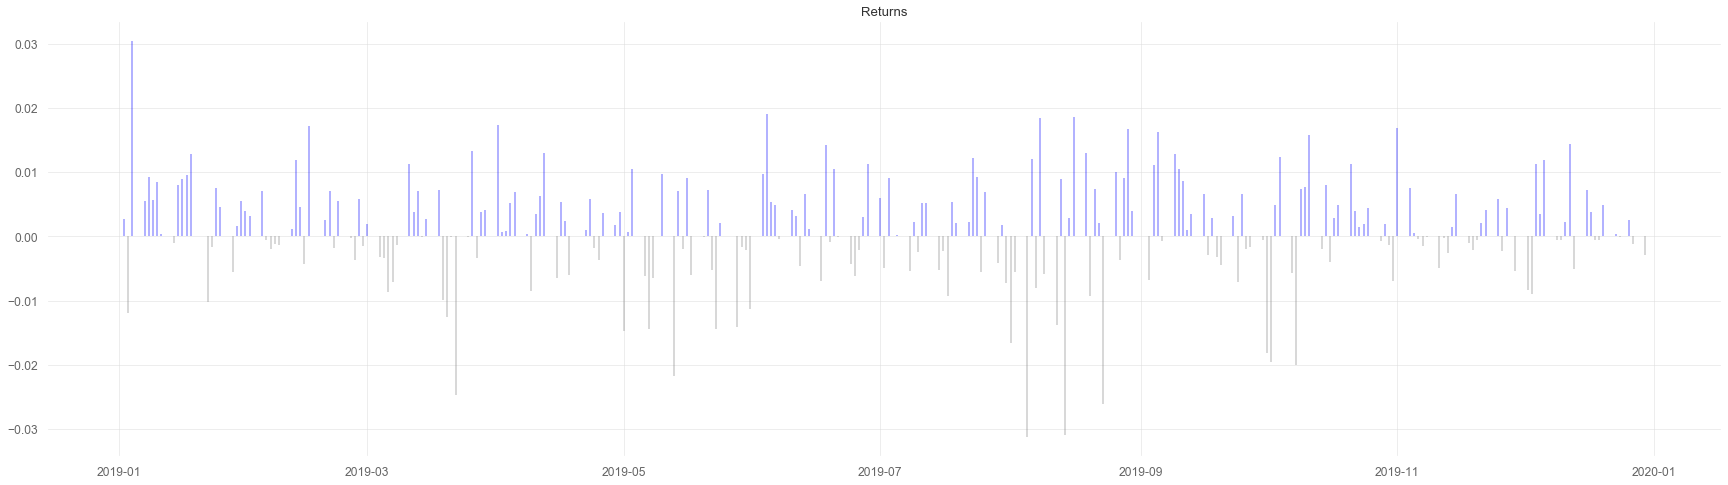

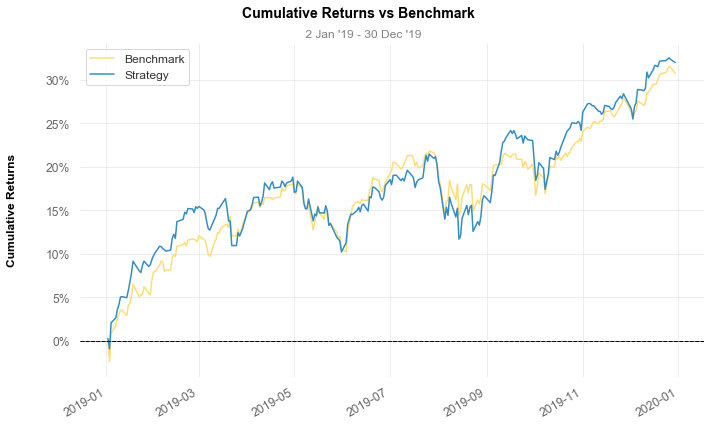

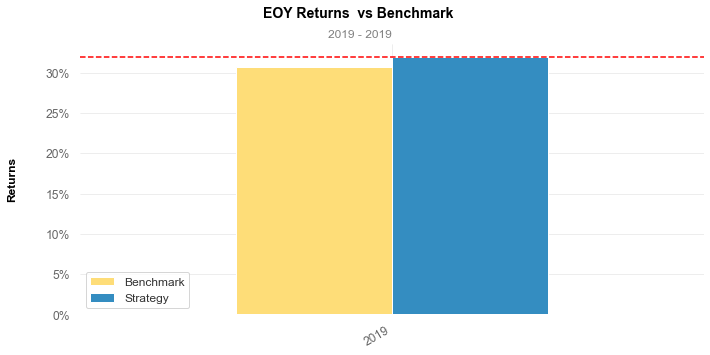

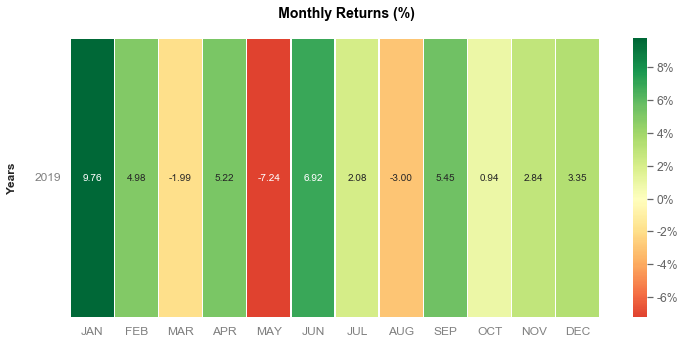

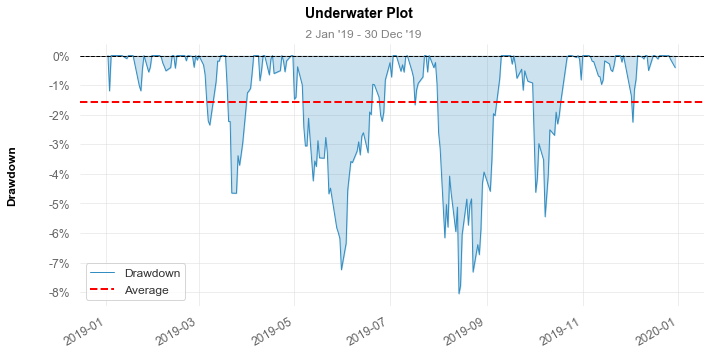

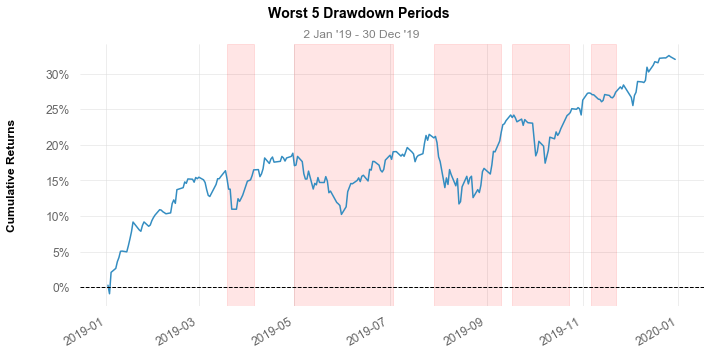

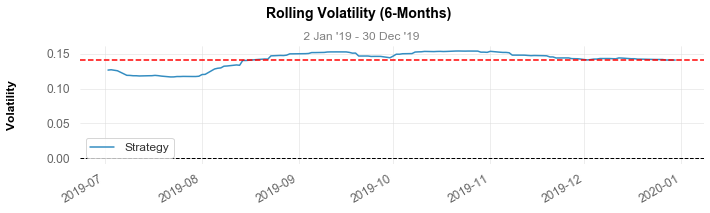

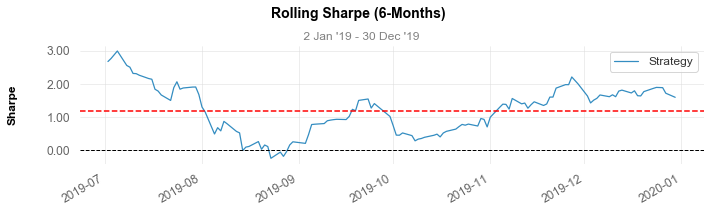

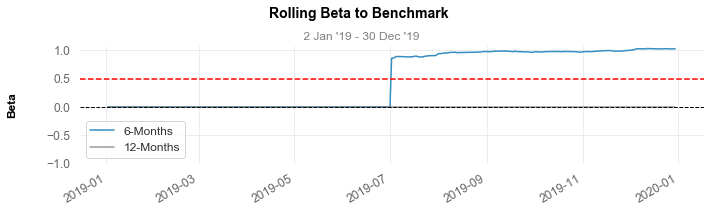

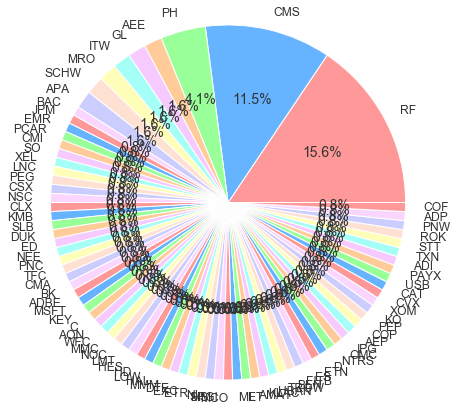

(None, None, None, None, None, None, None, None, None)

In [153]:

p = Engine(
    start_date = '2019-01-01',
    end_date = '2019-12-31',
    portfolio = port1_assets,
    weights = weight,
    benchmark = ['SPY']
)

empyrial(p)

NameError: name 'oracle' is not defined

In [161]:
df_edges = pd.DataFrame(edges.items(), columns=["source", "target"])

In [163]:
G = nx.from_pandas_edgelist(df_edges)

In [167]:
len(G.edges())

61

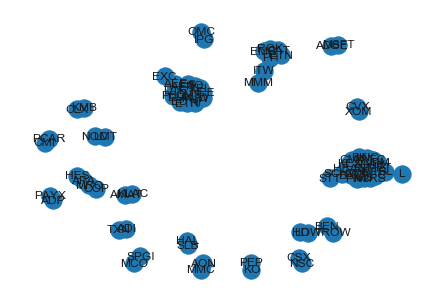

In [168]:
nx.draw(G,with_labels=True)
plt.draw()
plt.show()

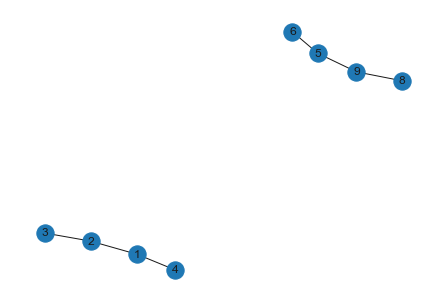

In [170]:
k = nx.Graph()
k.add_edge(1, 2)
k.add_edge(3, 2)
k.add_edge(1, 4)

k.add_edge(5, 9)
k.add_edge(9, 8)
k.add_edge(6, 5)

nx.draw(k,with_labels=True)
plt.draw()
plt.show()

In [171]:
degree_of_centrality[1].to_numpy()

array([0.0125, 0.175 , 0.0125, 0.0125, 0.0625, 0.0125, 0.0125, 0.2375,
       0.0125, 0.0125, 0.0125, 0.0125, 0.0125, 0.0125, 0.025 , 0.0125,
       0.0125, 0.0125, 0.0125, 0.0125, 0.0125, 0.0125, 0.0125, 0.0125,
       0.0125, 0.0125, 0.0125, 0.0125, 0.025 , 0.0125, 0.0125, 0.0125,
       0.0125, 0.0125, 0.0125, 0.0125, 0.0125, 0.0125, 0.0125, 0.025 ,
       0.0125, 0.0125, 0.0125, 0.025 , 0.0125, 0.0125, 0.0125, 0.0125,
       0.0125, 0.0125, 0.0125, 0.0125, 0.0125, 0.0125, 0.0125, 0.0125,
       0.0125, 0.0125, 0.0125, 0.0125, 0.0125, 0.0125, 0.0125, 0.025 ,
       0.0125, 0.0125, 0.0125, 0.025 , 0.0125, 0.0125, 0.0125, 0.0125,
       0.0125, 0.0125, 0.0125, 0.0125, 0.0125, 0.0125, 0.0125, 0.0125,
       0.0125])

In [173]:
def optimize(ret,degree,betweenness,closeness):
    w = cp.Variable(3)
    # cd=np.random.uniform(low=-1, high=1,size=(len(train.columns)))
    # cb=np.random.uniform(low=1, high=2,size=(len(train.columns)))
    # cc=np.random.uniform(low=3, high=4,size=(len(train.columns)))
    C = np.vstack([degree[1].to_numpy(),betweenness[1].to_numpy(),closeness[1].to_numpy()])
    mu = calc_Mu(ret).to_numpy()
    C.shape
    # print(cd)

    prob = cp.Problem(cp.Maximize(mu.T@(C.T@w)),[sum(w)==1,w>=0])
    prob.solve()
    # output = {'weights':w.value, 'total_weights':np.sum(w.value),
    #                 'expected_return': mu.dot(w.value), 'std': np.sqrt(w.value.dot(Sigma).dot(w.value)),
    #                 'stocks':np.sum(w.value[:-1]), 'bonds':w.value[-1]}
    return w.value

In [180]:
alphas = optimize(returns[betweenness_centrality[0].values], degree_of_centrality, betweenness_centrality, closeness_centrality)
alphas

array([1.54008578e-10, 2.90521241e-10, 1.00000000e+00])

In [181]:
def allocate(alphas,degree,betweenness,closeness):
  C_avg = (alphas[0]*degree[1] + alphas[1]*betweenness[1] + alphas[2]*closeness[1]).to_numpy()
  weights = C_avg/C_avg.sum()
  return weights

In [183]:
weights = allocate(alphas,  degree_of_centrality, betweenness_centrality, closeness_centrality)
weights.sum()

0.9999999999999999

Start date: 2016-01-01
End date: 2021-12-08


,Backtest
,
Annual return,18.93%
Cumulative return,180.0%
Annual volatility,21.72 %
Winning day ratio,55.38%
Sharpe ratio,0.91
Calmar ratio,0.45
Information ratio,0.000000
Stability,0.87
Max Drawdown,-41.78 %


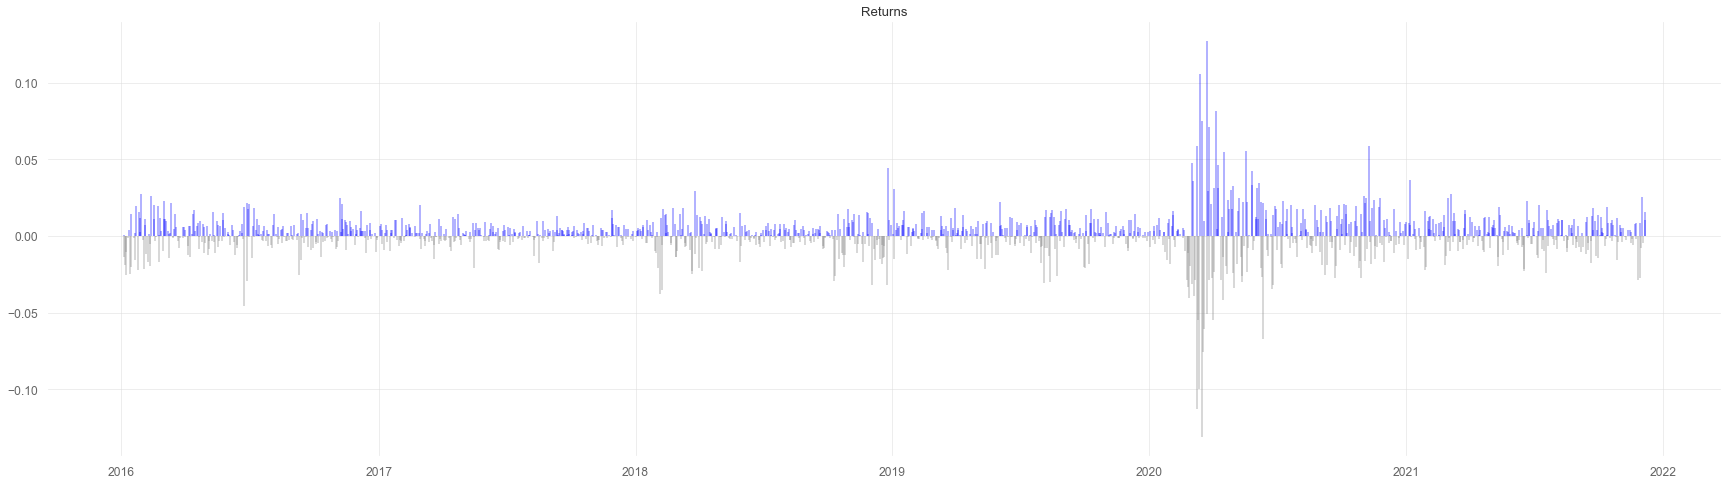

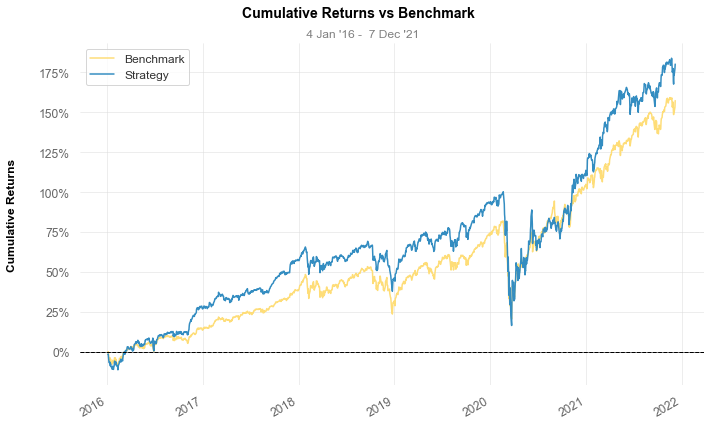

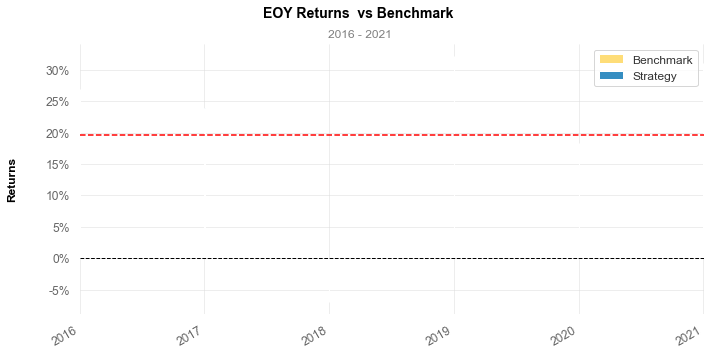

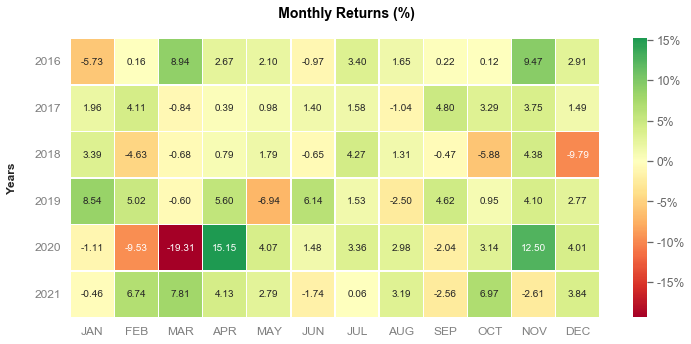

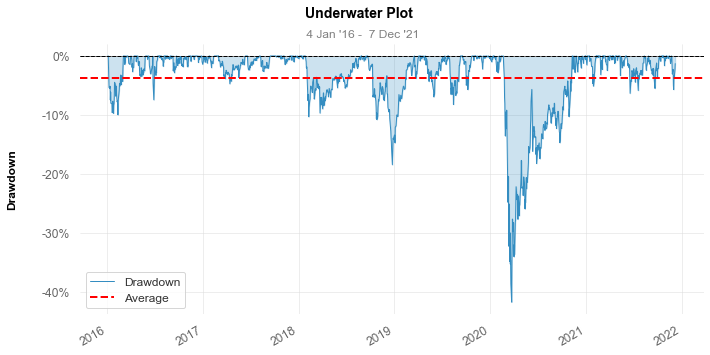

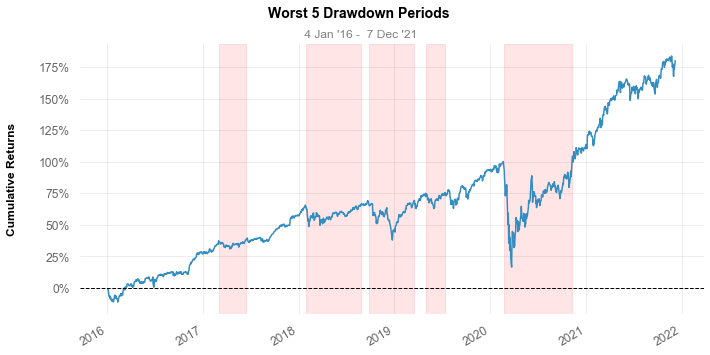

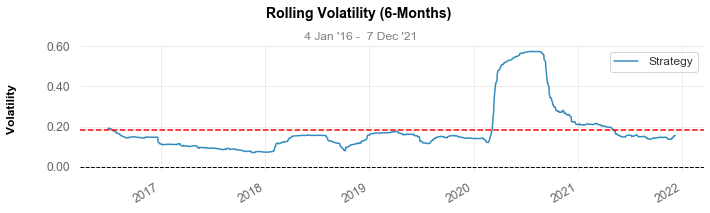

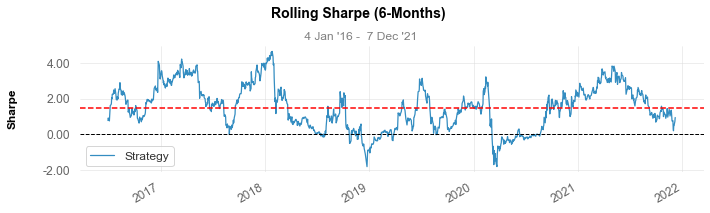

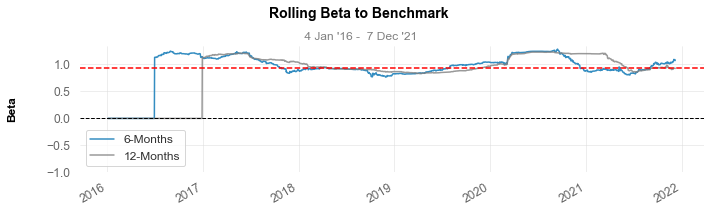

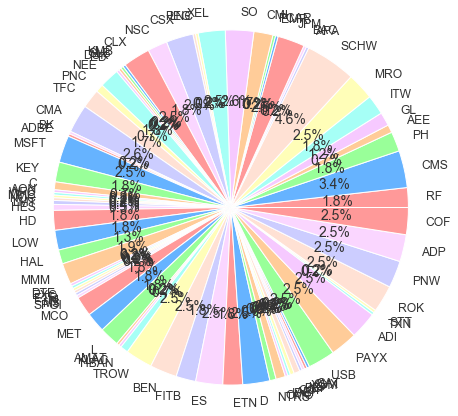

(None, None, None, None, None, None, None, None, None)

In [189]:
p = Engine(
    start_date = '2016-01-01',
    end_date = '2021-12-08',
    portfolio = port1_assets,
    weights = weights,
    benchmark = ['SPY']
)

empyrial(p)